# 6a. Visualisierung verschiedener Merkmale einer Textsammlung

## Inhalte 
1. Lexical Dispersion Plot (NLTK)
2. Visualisierung von Worthäufigkeiten
3. Visualisierung von Ähnlichkeiten

In [1]:
import pathlib

import nltk
import pandas as pd
import seaborn as sns

# set style of visualizations using seaborn
sns.set_style("whitegrid")

from reader import fairytale_corpus_reader

DATA_DIR = pathlib.Path().cwd().parent.joinpath("data")
GERMAN_STOPWORDS = set(nltk.corpus.stopwords.words("german"))
PROC_DATA_DIR = DATA_DIR.joinpath("processed")
IMG_DATA_DIR = DATA_DIR.joinpath("images")

In [2]:
# Create nltk.Text object from all tokens in fairytales corpus
tokens = [token.lower() for token in fairytale_corpus_reader.words()]
text = nltk.Text(tokens)

In [3]:
# create a sorted list of keywords to search in the corpus: example animals
animals = sorted(["wolf", "pferd", "esel", "hund", "katze"])
animals

['esel', 'hund', 'katze', 'pferd', 'wolf']

## 1. Lexical Dispersion Plot (NLTK)

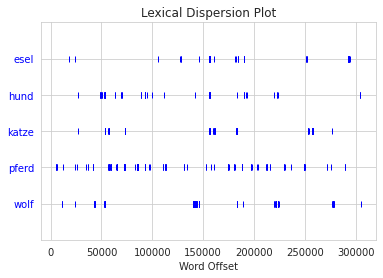

In [4]:
# Create a lexical dispersion plot using nltk
# each occurence of a token in the text will be displayed as a blue bar
text.dispersion_plot(animals)

In [5]:
# load counts table from disk into a pandas.DataFrame
filename = PROC_DATA_DIR.joinpath("fairytales-animals-counts.tsv")
fairytales_animals_counts = pd.read_csv(filename, sep="\t")
fairytales_animals_counts.set_index("title", inplace=True)
fairytales_animals_counts.head()

,esel,hund,katze,pferd,wolf
title,,,,,
grimm_Das_kluge_Grethel_395-397.txt,0,0,0,0,0
grimm_allerleirauh_353-359.txt,0,0,0,0,0
grimm_aschenputtel_119-126.txt,0,0,0,5,0
grimm_bruder_lustig_402-413.txt,0,0,0,0,0
grimm_bruederchen_und_schwesterchen__057-064.txt,0,0,0,1,3


## 2. Visualisierung von Worthäufigkeiten

### 2.1 Vertical Bar Plot (pandas)
- vgl. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

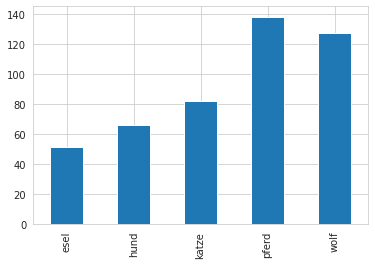

In [6]:
# Plot the sum of each animals counts over all fairytale texts in a bar chart using pandas
barplot = fairytales_animals_counts.sum().plot(kind="bar");

In [7]:
# store the barplot on disk
filename = IMG_DATA_DIR.joinpath("fairytales-animals-counts-barplot.png")
barplot.figure.savefig(filename, bbox_inches="tight", dpi=300)

In [8]:
# Show the 10 highest counts in fairytales for a particular animal
query = "wolf"
fairytales_animals_counts[query].sort_values(ascending=False).head(10)

title
grimm_die_zwei_brueder_311-334.txt                           18
grimm_der_wolf_und_der_fuchs_383-385.txt                     18
grimm_der_wolf_und_die_sieben_jungen_geislein_026-029.txt    18
grimm_rothkaeppchen_140-144.txt                              17
grimm_der_wolf_und_der_mensch_381-382.txt                    12
grimm_der_alte_sultan_242-244.txt                            10
grimm_der_wunderliche_spielmann_044-047.txt                   9
grimm_daumesdick_194-200.txt                                  8
grimm_der_zaunkoenig_und_der_baer_087-089.txt                 6
grimm_die_hochzeit_der_frau_fuechsin_201-204.txt              5
Name: wolf, dtype: int64

In [9]:
# Use pandas to display the counts per animal using a background gradient
fairytales_animals_counts.head(25).style.background_gradient()

,esel,hund,katze,pferd,wolf
title,,,,,
grimm_Das_kluge_Grethel_395-397.txt,0,0,0,0,0
grimm_allerleirauh_353-359.txt,0,0,0,0,0
grimm_aschenputtel_119-126.txt,0,0,0,5,0
grimm_bruder_lustig_402-413.txt,0,0,0,0,0
grimm_bruederchen_und_schwesterchen__057-064.txt,0,0,0,1,3
grimm_das_blaue_licht_150-154.txt,0,0,0,0,0
grimm_das_buerle_335-340.txt,0,0,0,0,0
grimm_das_buerle_im_himmel_331-331.txt,0,0,0,0,0
grimm_das_dietmarsische_luegenmaerchen_294-294.txt,0,0,0,0,0


### 2.2 Heatmap (seaborn)
- vgl. https://seaborn.pydata.org/generated/seaborn.heatmap.html

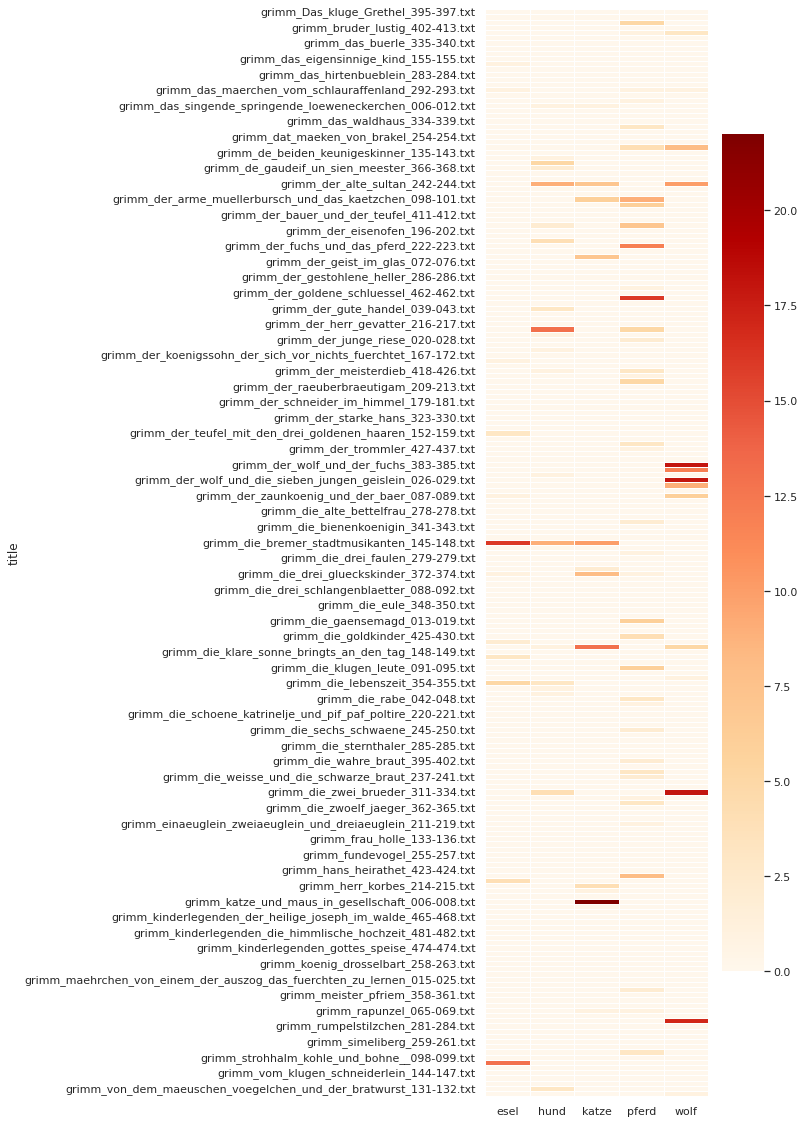

In [10]:
# Use seaborn to display the counts as a heatmap visualization
sns.set(rc={"figure.figsize": (5, 20)})
heatmap = sns.heatmap(fairytales_animals_counts, cmap="OrRd", linewidth=1)

In [11]:
# store the heatmap on disk
filename = IMG_DATA_DIR.joinpath("fairytales-animals-heatmap.png")
heatmap.figure.savefig(filename, bbox_inches="tight", dpi=300)

In [12]:
# find rows in table, that contain at least one animal's count with 1 -> sum of row is greater than 0
rows_with_animal_counts = fairytales_animals_counts.sum(axis=1) != 0
# select only these "positive count" rows from table
positive_fairytales_animals_counts = fairytales_animals_counts[rows_with_animal_counts]
positive_fairytales_animals_counts.head()

,esel,hund,katze,pferd,wolf
title,,,,,
grimm_aschenputtel_119-126.txt,0,0,0,5,0
grimm_bruederchen_und_schwesterchen__057-064.txt,0,0,0,1,3
grimm_das_eselein_264-267.txt,1,0,0,0,0
grimm_das_maerchen_vom_schlauraffenland_292-293.txt,1,0,0,1,1
grimm_das_raethsel_127-130.txt,0,0,0,1,0


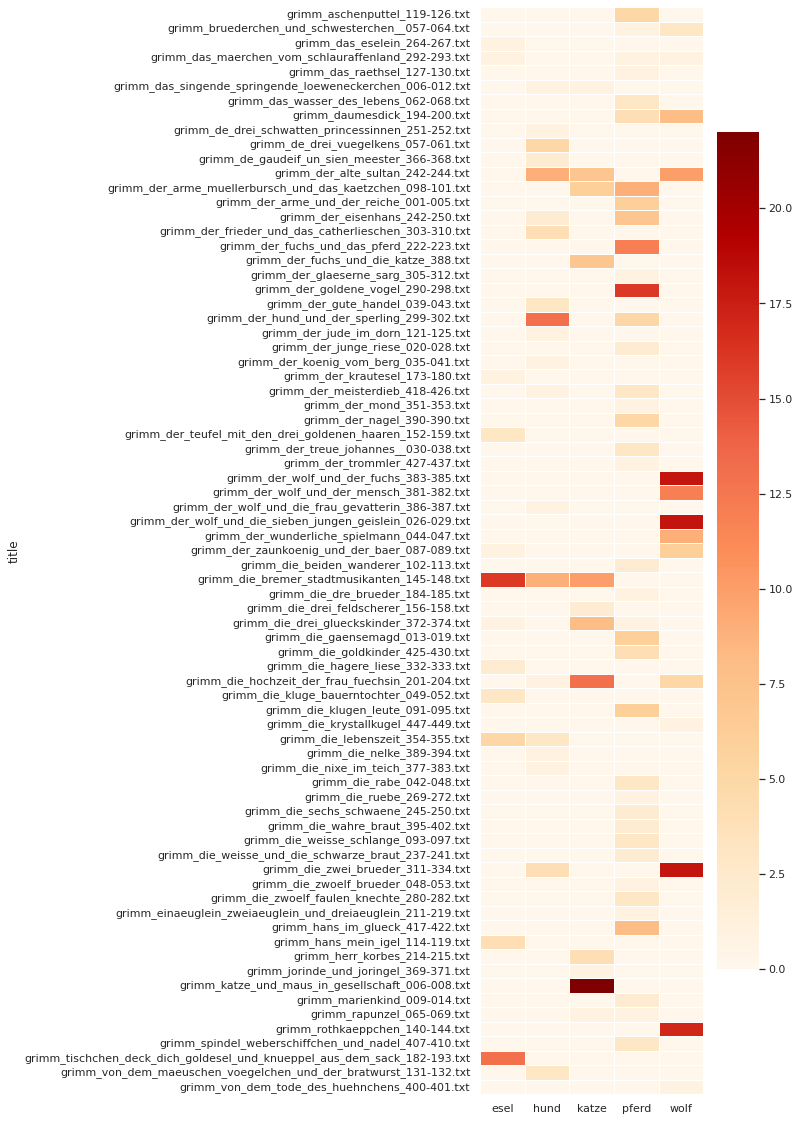

In [13]:
# Use seaborn to display the positive counts as a heatmap visualization
sns.set(rc={"figure.figsize": (5, 20)})
heatmap = sns.heatmap(positive_fairytales_animals_counts, cmap="OrRd", linewidth=1)

In [14]:
# store the heatmap on disk
filename = IMG_DATA_DIR.joinpath("fairytales-animals-heatmap-positive-counts.png")
heatmap.figure.savefig(filename, bbox_inches="tight", dpi=300)

## 3. Visualisierung von Ähnlichkeiten
- Heatmap Korrelationen (pandas and seaborn)
- see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [15]:
# Calculate the correlations between the animal counts per fairytale using pandas
# see: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
# correlation coefficients range from 1 to -1
# a value of 1 (esel and esel) means perfect correlation
positive_fairytales_animals_counts.corr()

,esel,hund,katze,pferd,wolf
esel,1.000000,0.275669,0.176300,-0.167738,-0.095461
hund,0.275669,1.000000,0.164927,-0.079750,0.073565
katze,0.176300,0.164927,1.000000,-0.115548,-0.003337
pferd,-0.167738,-0.079750,-0.115548,1.000000,-0.199046
wolf,-0.095461,0.073565,-0.003337,-0.199046,1.000000


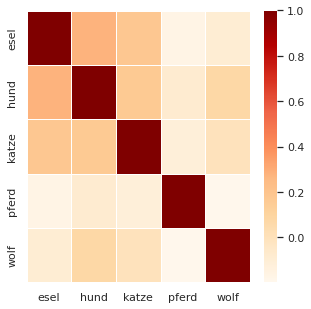

In [16]:
# Use seaborn to display the correlation coefficients as a heatmap visualization
sns.set(rc={"figure.figsize": (5, 5)})
heatmap = sns.heatmap(positive_fairytales_animals_counts.corr(), cmap="OrRd", linewidth=1);

In [17]:
# store the heatmap on disk
filename = IMG_DATA_DIR.joinpath("animals-correlations-heatmap-positive-counts.png")
heatmap.figure.savefig(filename, bbox_inches="tight", dpi=300)

In [18]:
# The matrix can be transposed using the method .T
# this way we can calculate the correlations between the fairytales regarding the animal counts
positive_fairytales_animals_counts.head().T.corr()

title,grimm_aschenputtel_119-126.txt,grimm_bruederchen_und_schwesterchen__057-064.txt,grimm_das_eselein_264-267.txt,grimm_das_maerchen_vom_schlauraffenland_292-293.txt,grimm_das_raethsel_127-130.txt
title,,,,,
grimm_aschenputtel_119-126.txt,1.000000,0.085749,-0.250000,0.408248,1.000000
grimm_bruederchen_und_schwesterchen__057-064.txt,0.085749,1.000000,-0.342997,0.560112,0.085749
grimm_das_eselein_264-267.txt,-0.250000,-0.342997,1.000000,0.408248,-0.250000
grimm_das_maerchen_vom_schlauraffenland_292-293.txt,0.408248,0.560112,0.408248,1.000000,0.408248
grimm_das_raethsel_127-130.txt,1.000000,0.085749,-0.250000,0.408248,1.000000


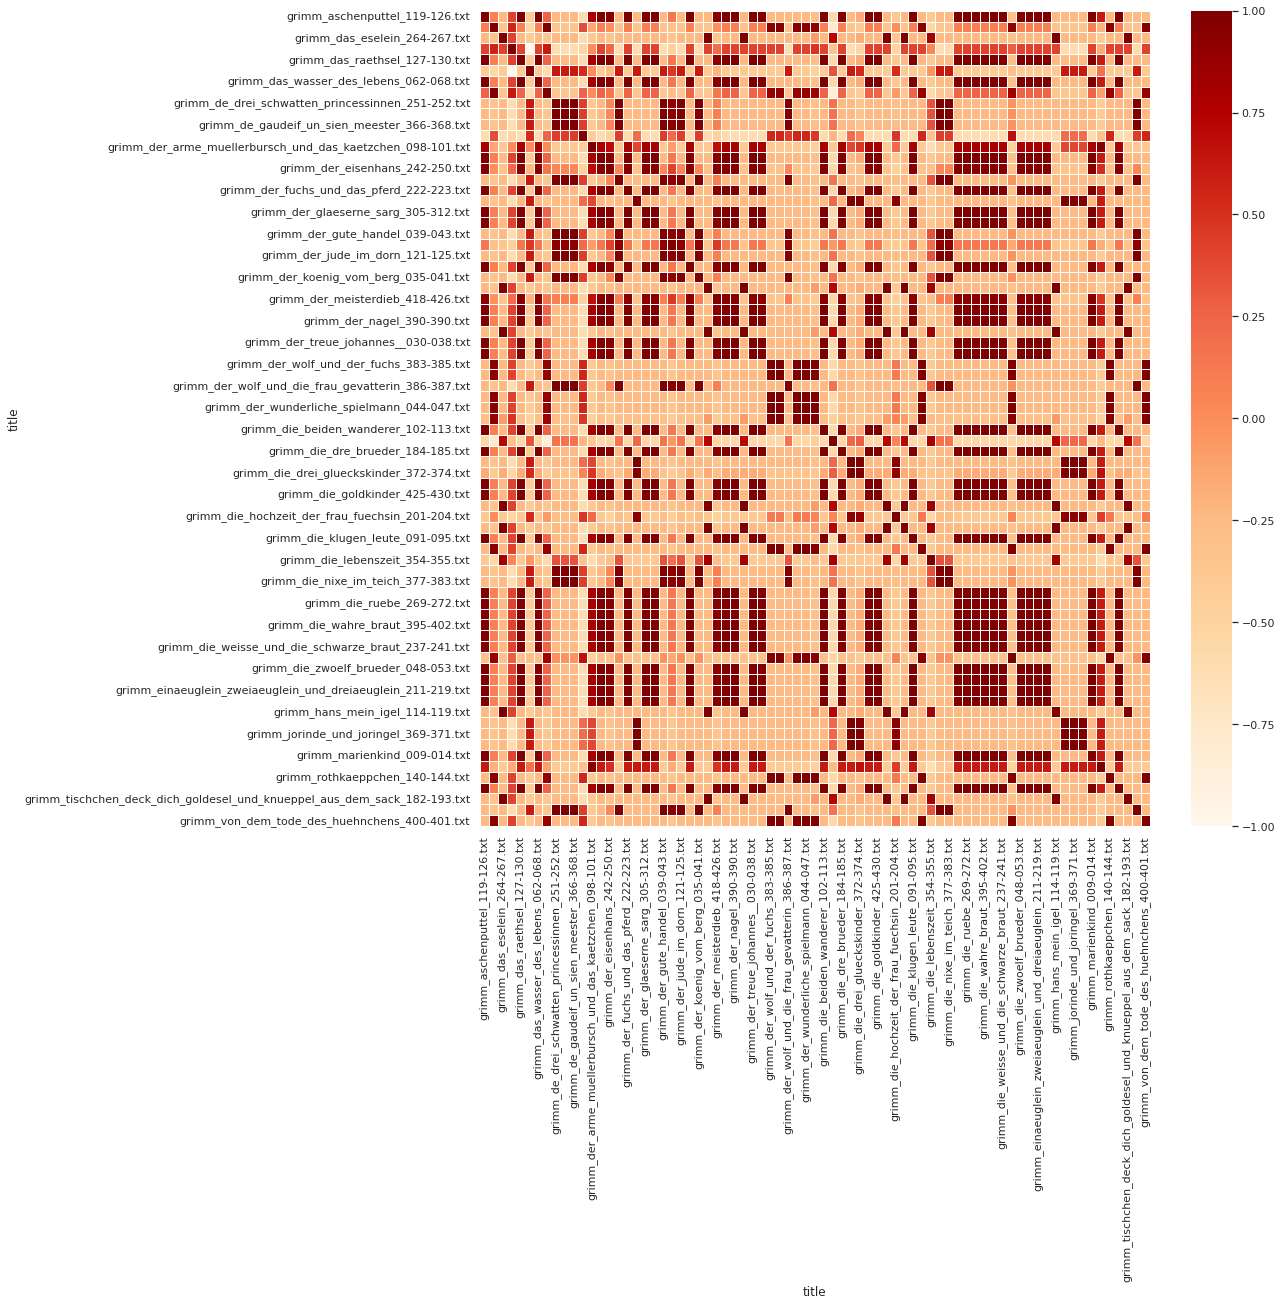

In [19]:
# Use seaborn to display the correlation coefficients as a heatmap visualization
sns.set(rc={"figure.figsize": (15, 15)})
heatmap = sns.heatmap(positive_fairytales_animals_counts.T.corr(), cmap="OrRd", linewidth=1);

In [20]:
# store the heatmap on disk
filename = IMG_DATA_DIR.joinpath("fairytales-correlations-animals-heatmap-positive-counts.png")
heatmap.figure.savefig(filename, bbox_inches="tight", dpi=300)

In [21]:
import session_info

session_info.show()